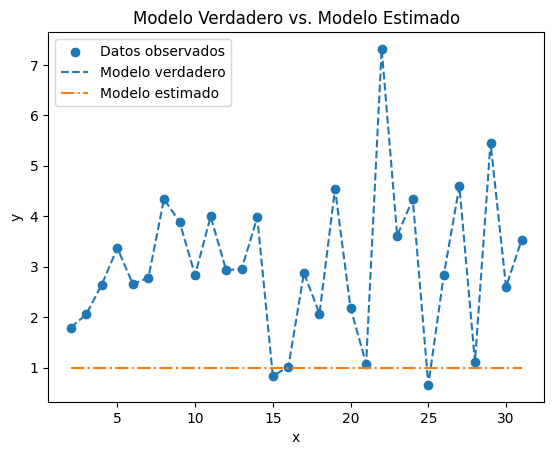

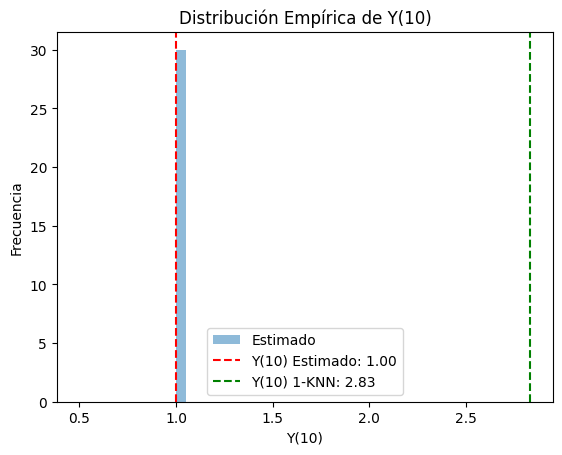

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor


def true_model(x, epsilon):
    return 1 + np.log(x) + epsilon

# Generar muestras
np.random.seed(42)
n = 30
X = np.arange(2, n + 2)
epsilon = np.random.normal(0, 0.1 * X, n)
Y = 1 + np.log(X) + epsilon

# Estimar beta usando máxima verosimilitud
beta_hat = np.cov(np.vstack((np.ones_like(X), np.log(X))), Y)[0, 1] / np.var(np.log(X))

# Modelo estimado
Y_estimated = 1 + beta_hat * np.log(X)

# Visualizar resultados
plt.scatter(X, Y, label='Datos observados')
plt.plot(X, true_model(X, epsilon), label='Modelo verdadero', linestyle='--')
plt.plot(X, Y_estimated, label='Modelo estimado', linestyle='-.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Modelo Verdadero vs. Modelo Estimado')
plt.show()

# Distribución empírica de Y(10)
Y_10 = 1 + beta_hat * np.log(10)

# Método 1-KNN
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X.reshape(-1, 1), Y)
Y_knn_10 = knn.predict([[10]])

# Visualizar distribución empírica
plt.hist(Y_estimated, bins=20, alpha=0.5, label='Estimado')
plt.axvline(Y_10, color='red', linestyle='--', label=f'Y(10) Estimado: {Y_10:.2f}')
plt.axvline(Y_knn_10, color='green', linestyle='--', label=f'Y(10) 1-KNN: {Y_knn_10[0]:.2f}')
plt.xlabel('Y(10)')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Distribución Empírica de Y(10)')
plt.show()